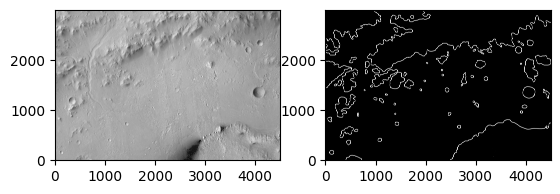

In [1]:
import scipy.io as sio
import numpy as np
import csv
import matplotlib.pyplot as plt
from graph import *
from utils import *
from AStar import *
from grid import *

dataFolder = "data/"

### load data from csv file
# X, Y

# landmarks coordinates
Xlm = np.loadtxt(dataFolder +"Xlm.csv")
Ylm = np.loadtxt(dataFolder +"Ylm.csv")
pos_lm = np.array([Xlm, Ylm]).T # landmark positions

# map and obstacle map
mars_map = np.loadtxt(dataFolder +"map.csv", delimiter=",")
obstacle_map = np.loadtxt(dataFolder +"obstacle.csv", delimiter=",")


## Constants of the problem
maxVel = 0.5; # [m/s] maximum velocity of the rover 
LAxis = 1; # [m] length of the rover wheel axis



# Create grid (45kmx30km, 10m resolution)
grid = Grid(xlim = 45000, ylim = 30000, res = 10, 
            image = mars_map, obstacle = obstacle_map, 
            landmarks = pos_lm, corner = 'll') 


plt.subplot(1,2,1)

plt.imshow(np.flipud(grid.image), cmap='gray')
plt.gca().invert_yaxis()
plt.subplot(1,2,2)
plt.imshow(np.flipud(grid.obstacle), cmap='gray')
plt.gca().invert_yaxis()
plt.show()


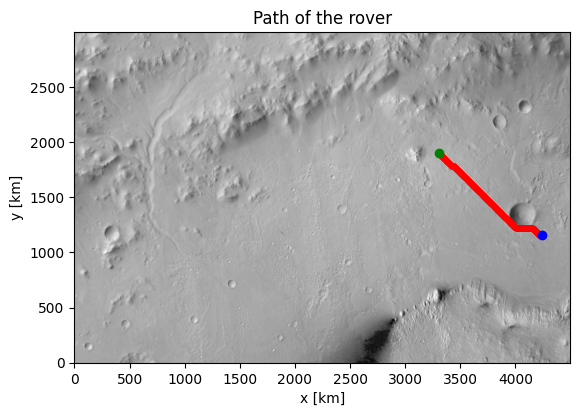

In [2]:
### TASK 1 ### --2.8s average runtime
P0 = (42.38*10**3, 11.59*10**3)
P1 = (33.07*10**3, 19.01*10**3)


## 1.1) Plot the trajectory of the rover in the map
plt.figure(1)
plt.title("Path of the rover")

# Create path with A*


path, gScore = AStar(grid, P0, P1)
# Plot path
path_coords = [(node[0], node[1]) for node in path]
for coord in path_coords:
    
    plt.plot(coord[0]/10, coord[1]/10, 'r.')



plt.imshow(np.flipud(grid.image), cmap='gray')
plt.gca().invert_yaxis()
plt.xlabel('x [km]')
plt.ylabel('y [km]')

plt.plot(P0[0]/10, P0[1]/10, 'bo')
plt.plot(P1[0]/10, P1[1]/10, 'go')
plt.show()


# 1.2) Plot the velocity profile of the rover
# 1.3) Plot the steering angle profile of the rover
# 1.4) Plot the rate of change of the steering angle profile of the rover


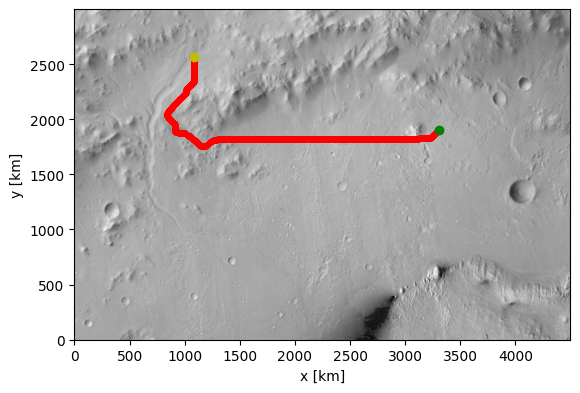

In [3]:
### TASK 2 ### -- 3min average runtime
# Go frop P0 = P
P_start = P1
P_end = (10.87*10**3, 25.67*10**3)

path2, gScore2 = AStar(grid, P_start, P_end)

# Plot path
path_coords = [(node[0], node[1]) for node in path2]
for coord in path_coords:
    
    plt.plot(coord[0]/10, coord[1]/10, 'r.')



plt.imshow(np.flipud(grid.image), cmap='gray')
plt.gca().invert_yaxis()
plt.xlabel('x [km]')
plt.ylabel('y [km]')

plt.plot(P_start[0]/10, P_start[1]/10, 'go')
plt.plot(P_end[0]/10, P_end[1]/10, 'yo')
plt.show()
